**Step 1: Environment Setup**

In [ ]:
# =============================================================================
# TESLA T4 YOLOV8 REAL-TIME OBJECT DETECTION
# Step 1: System Information & GPU Check
# =============================================================================

import sys
import subprocess
import pkg_resources
import importlib

# Check Python version
print("🐍 PYTHON VERSION CHECK")
print("=" * 50)
print(f"Python Version: {sys.version}")
print(f"Python Executable: {sys.executable}")

# Check if we're in Colab
try:
    import google.colab
    ENVIRONMENT = "Google Colab"
    print(f"📍 Environment: {ENVIRONMENT}")
except ImportError:
    ENVIRONMENT = "Local/Jupyter"
    print(f"📍 Environment: {ENVIRONMENT}")

print("\n✅ Python environment ready!")

/tmp/ipython-input-1417378910.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


🐍 PYTHON VERSION CHECK
Python Version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Python Executable: /usr/bin/python3
📍 Environment: Google Colab

✅ Python environment ready!


**🔧 Step 2: CUDA & GPU Verification**

In [ ]:
# =============================================================================
# Step 2: CUDA and GPU Verification
# =============================================================================

# Install basic requirements first
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118 --quiet
!pip install psutil GPUtil --quiet

# Now check GPU
import torch
import psutil
import platform

try:
    import GPUtil
    gpus = GPUtil.getGPUs()
    gpu_available = len(gpus) > 0
except:
    gpu_available = torch.cuda.is_available()

print("🖥️  SYSTEM INFORMATION")
print("=" * 50)
print(f"OS: {platform.system()} {platform.release()}")
print(f"Processor: {platform.processor()}")
print(f"Total RAM: {psutil.virtual_memory().total / (1024**3):.2f} GB")
print(f"Available RAM: {psutil.virtual_memory().available / (1024**3):.2f} GB")

print("\n🎮 GPU INFORMATION")
print("=" * 50)

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / (1024**3)

    print(f"✅ CUDA Available: {torch.cuda.is_available()}")
    print(f"🚀 GPU Model: {gpu_name}")
    print(f"💾 GPU Memory: {gpu_memory:.1f} GB")
    print(f"🔧 CUDA Version: {torch.version.cuda}")
    print(f"🏗️  cuDNN Version: {torch.backends.cudnn.version()}")

    # Tesla T4 specific checks
    if "T4" in gpu_name:
        print(f"\n🎯 TESLA T4 DETECTED!")
        print(f"   • Tensor Cores: ✅ Available")
        print(f"   • Mixed Precision: ✅ Supported")
        print(f"   • Optimal for YOLOv8 Large model")
        DEVICE_TYPE = "Tesla T4"
    else:
        print(f"\n💡 GPU detected: {gpu_name}")
        DEVICE_TYPE = gpu_name

    # Test CUDA functionality
    test_tensor = torch.randn(1000, 1000).cuda()
    test_result = torch.mm(test_tensor, test_tensor)
    print(f"🧪 CUDA Test: ✅ Passed")

    # Clean up
    del test_tensor, test_result
    torch.cuda.empty_cache()

else:
    print("❌ CUDA not available!")
    print("⚠️  Running on CPU only - performance will be limited")
    DEVICE_TYPE = "CPU"

print(f"\n🎛️  Device Configuration: {DEVICE_TYPE}")

  Preparing metadata (setup.py) ... done
🖥️  SYSTEM INFORMATION
OS: Linux 6.1.123+
Processor: x86_64
Total RAM: 12.67 GB
Available RAM: 10.96 GB

🎮 GPU INFORMATION
✅ CUDA Available: True
🚀 GPU Model: Tesla T4
💾 GPU Memory: 14.7 GB
🔧 CUDA Version: 12.6
🏗️  cuDNN Version: 91002

🎯 TESLA T4 DETECTED!
   • Tensor Cores: ✅ Available
   • Mixed Precision: ✅ Supported
   • Optimal for YOLOv8 Large model
🧪 CUDA Test: ✅ Passed

🎛️  Device Configuration: Tesla T4


**📚 Step 3: Install Required Libraries**

In [ ]:
# =============================================================================
# Step 3: Install All Required Libraries
# =============================================================================

# List of required packages for Tesla T4 optimization
REQUIRED_PACKAGES = [
    "ultralytics>=8.0.0",          # YOLOv8
    "opencv-python>=4.8.0",        # Computer Vision
    "matplotlib>=3.5.0",           # Plotting
    "seaborn>=0.11.0",            # Statistical plots
    "numpy>=1.21.0",              # Numerical computing
    "pandas>=1.3.0",              # Data manipulation
    "pillow>=8.3.0",              # Image processing
    "tqdm>=4.62.0",               # Progress bars
    "pyyaml>=6.0",                # Configuration files
    "scipy>=1.7.0",               # Scientific computing
    "scikit-learn>=1.0.0",        # Machine learning
    "ipywidgets>=7.6.0",          # Jupyter widgets
]

# Optional GPU acceleration packages
GPU_PACKAGES = [
    "onnx>=1.12.0",               # ONNX model format
    "onnxruntime-gpu>=1.15.0",    # ONNX GPU runtime
]

print("📦 INSTALLING REQUIRED PACKAGES")
print("=" * 50)

# Install main packages
for package in REQUIRED_PACKAGES:
    package_name = package.split('>=')[0].split('==')[0]
    try:
        print(f"📥 Installing {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
        print(f"   ✅ {package_name} installed successfully")
    except subprocess.CalledProcessError:
        print(f"   ⚠️ Failed to install {package_name}")

# Install GPU packages if CUDA available
if torch.cuda.is_available():
    print(f"\n🚀 Installing GPU acceleration packages...")
    for package in GPU_PACKAGES:
        package_name = package.split('>=')[0].split('==')[0]
        try:
            print(f"📥 Installing {package_name}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
            print(f"   ✅ {package_name} installed successfully")
        except subprocess.CalledProcessError:
            print(f"   ⚠️ Failed to install {package_name}")

print(f"\n🎉 All packages installed successfully!")

📦 INSTALLING REQUIRED PACKAGES
📥 Installing ultralytics...
   ✅ ultralytics installed successfully
📥 Installing opencv-python...
   ✅ opencv-python installed successfully
📥 Installing matplotlib...
   ✅ matplotlib installed successfully
📥 Installing seaborn...
   ✅ seaborn installed successfully
📥 Installing numpy...
   ✅ numpy installed successfully
📥 Installing pandas...
   ✅ pandas installed successfully
📥 Installing pillow...
   ✅ pillow installed successfully
📥 Installing tqdm...
   ✅ tqdm installed successfully
📥 Installing pyyaml...
   ✅ pyyaml installed successfully
📥 Installing scipy...
   ✅ scipy installed successfully
📥 Installing scikit-learn...
   ✅ scikit-learn installed successfully
📥 Installing ipywidgets...
   ✅ ipywidgets installed successfully

🚀 Installing GPU acceleration packages...
📥 Installing onnx...
   ✅ onnx installed successfully
📥 Installing onnxruntime-gpu...
   ✅ onnxruntime-gpu installed successfully

🎉 All packages installed successfully!


**🔗 Step 4: Import Libraries & Configuration**

In [ ]:
# =============================================================================
# Step 4: Import All Libraries and Configure Environment
# =============================================================================

# Standard libraries
import os
import sys
import time
import json
import yaml
import warnings
from pathlib import Path
from datetime import datetime
from collections import defaultdict, deque
from typing import Dict, List, Tuple, Optional, Union

# Data science libraries
import numpy as np
import pandas as pd
from scipy import stats

# Computer vision and ML
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from ultralytics import YOLO

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont

# Jupyter/Colab specific
from IPython.display import display, clear_output, HTML, Video
from tqdm.auto import tqdm
import ipywidgets as widgets

# Warnings suppression for cleaner output
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

print("📚 LIBRARY IMPORTS")
print("=" * 50)
print(f"✅ OpenCV version: {cv2.__version__}")
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ NumPy version: {np.__version__}")
print(f"✅ Matplotlib version: {plt.matplotlib.__version__}")

# Configure matplotlib for better display
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configure seaborn
sns.set_theme(style="darkgrid")
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print(f"✅ Visualization configured")

# Tesla T4 specific optimizations
if torch.cuda.is_available():
    # Enable optimizations for Tesla T4
    torch.backends.cudnn.benchmark = True      # Auto-tune algorithms
    torch.backends.cuda.matmul.allow_tf32 = True  # Use Tensor Cores
    torch.backends.cudnn.allow_tf32 = True     # Additional T4 optimization

    print(f"\n🚀 TESLA T4 OPTIMIZATIONS ENABLED")
    print(f"   • cuDNN benchmark: ✅")
    print(f"   • TensorFloat-32: ✅")
    print(f"   • Tensor Core acceleration: ✅")

# Set random seeds for reproducibility
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.cuda.manual_seed_all(RANDOM_SEED)

print(f"✅ Random seed set to {RANDOM_SEED} for reproducibility")
print(f"\n🎯 Environment setup complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
📚 LIBRARY IMPORTS
✅ OpenCV version: 4.12.0
✅ PyTorch version: 2.8.0+cu126
✅ NumPy version: 2.0.2
✅ Matplotlib version: 3.10.0
✅ Visualization configured

🚀 TESLA T4 OPTIMIZATIONS ENABLED
   • cuDNN benchmark: ✅
   • TensorFloat-32: ✅
   • Tensor Core acceleration: ✅
✅ Random seed set to 42 for reproducibility

🎯 Environment setup complete!


**📁 Step 5: Create Project Structure**

In [ ]:
# =============================================================================
# Step 5: Create Professional Project Structure
# =============================================================================

# Define project structure
PROJECT_STRUCTURE = {
    'data': {
        'raw': 'Raw input data',
        'processed': 'Processed datasets',
        'test_videos': 'Test video files',
        'test_images': 'Test image files'
    },
    'models': {
        'pretrained': 'Pre-trained YOLO models',
        'custom': 'Custom trained models',
        'optimized': 'Optimized models (ONNX, TensorRT)',
        'checkpoints': 'Training checkpoints'
    },
    'src': {
        'detection': 'Detection algorithms',
        'optimization': 'Performance optimization',
        'utils': 'Utility functions',
        'visualization': 'Plotting and display functions'
    },
    'configs': {
        'models': 'Model configurations',
        'training': 'Training configurations',
        'detection': 'Detection configurations'
    },
    'results': {
        'benchmarks': 'Performance benchmarks',
        'outputs': 'Detection outputs',
        'videos': 'Output videos',
        'images': 'Output images',
        'metrics': 'Performance metrics',
        'logs': 'System logs'
    },
    'notebooks': {
        'experiments': 'Experimental notebooks',
        'analysis': 'Analysis notebooks'
    },
    'tests': {
        'unit': 'Unit tests',
        'integration': 'Integration tests'
    }
}

def create_project_structure(base_path: str = ".") -> Dict[str, str]:
    """Create professional project directory structure"""

    created_dirs = {}

    print("📁 CREATING PROJECT STRUCTURE")
    print("=" * 50)

    for main_dir, subdirs in PROJECT_STRUCTURE.items():
        main_path = Path(base_path) / main_dir
        main_path.mkdir(exist_ok=True)
        created_dirs[main_dir] = str(main_path)

        if isinstance(subdirs, dict):
            for sub_dir, description in subdirs.items():
                sub_path = main_path / sub_dir
                sub_path.mkdir(exist_ok=True)
                created_dirs[f"{main_dir}/{sub_dir}"] = str(sub_path)
                print(f"  📂 {main_dir}/{sub_dir}/ - {description}")
        else:
            print(f"  📂 {main_dir}/ - {subdirs}")

    print(f"\n✅ Created {len(created_dirs)} directories")
    return created_dirs

# Create the structure
project_dirs = create_project_structure()

# Create essential configuration files
print(f"\n⚙️ CREATING CONFIGURATION FILES")
print("=" * 50)

# Tesla T4 optimized training config
tesla_t4_config = {
    'model': {
        'architecture': 'yolov8l',  # Large model for Tesla T4
        'input_size': 640,
        'num_classes': 80,  # COCO classes
    },
    'training': {
        'epochs': 100,
        'batch_size': 16,  # Optimal for 15GB VRAM
        'learning_rate': 0.001,
        'weight_decay': 0.0005,
        'warmup_epochs': 3,
        'patience': 10,
        'device': 'cuda',
        'mixed_precision': True,  # FP16 for Tesla T4
        'compile': True,  # PyTorch 2.0 optimization
    },
    'optimization': {
        'use_tensorrt': True,
        'use_fp16': True,
        'dynamic_batching': True,
        'memory_pooling': True,
    },
    'data': {
        'dataset': 'coco',
        'train_split': 0.8,
        'val_split': 0.1,
        'test_split': 0.1,
        'augmentation': True,
    }
}

# Detection config
detection_config = {
    'model': {
        'path': 'models/pretrained/yolov8l.pt',
        'confidence_threshold': 0.5,
        'iou_threshold': 0.45,
        'max_detections': 300,
    },
    'processing': {
        'input_size': 640,
        'device': 'cuda',
        'half_precision': True,
        'batch_size': 8,
    },
    'output': {
        'save_images': True,
        'save_videos': True,
        'save_metrics': True,
        'display_realtime': True,
    }
}

# Performance config for Tesla T4
performance_config = {
    'gpu': {
        'name': 'Tesla T4',
        'memory_gb': 15,
        'compute_capability': 7.5,
        'tensor_cores': True,
    },
    'optimization_targets': {
        'min_fps': 25,
        'max_memory_usage_gb': 12,
        'max_inference_ms': 40,
    },
    'benchmarking': {
        'warmup_iterations': 50,
        'benchmark_iterations': 200,
        'test_input_sizes': [480, 640, 832, 1024],
        'test_batch_sizes': [1, 4, 8, 16],
    }
}

# Save configuration files
config_files = {
    'configs/training/tesla_t4_config.yaml': tesla_t4_config,
    'configs/detection/detection_config.yaml': detection_config,
    'configs/performance_config.yaml': performance_config,
}

for config_path, config_data in config_files.items():
    with open(config_path, 'w') as f:
        yaml.dump(config_data, f, default_flow_style=False, indent=2)
    print(f"  ✅ Created {config_path}")

# Create README.md for the project
readme_content = '''# Tesla T4 YOLOv8 Real-Time Object Detection

This project implements high-performance real-time object detection optimized for Tesla T4 GPU.

## Features
- 25-35+ FPS performance on Tesla T4
- FP16 mixed precision optimization
- Multiple YOLOv8 model support
- Real-time video processing
- Comprehensive benchmarking

## Quick Start
1. Run the setup cells in order
2. Load your preferred YOLOv8 model
3. Start real-time detection

## Model Performance (Tesla T4)
- YOLOv8n: ~45 FPS
- YOLOv8s: ~35 FPS
- YOLOv8m: ~25 FPS
- YOLOv8l: ~20 FPS

Generated on: {timestamp}
'''.format(timestamp=datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

with open('README.md', 'w') as f:
    f.write(readme_content)

print(f"  ✅ Created README.md")
print(f"\n🎉 Project structure setup complete!")

📁 CREATING PROJECT STRUCTURE
  📂 data/raw/ - Raw input data
  📂 data/processed/ - Processed datasets
  📂 data/test_videos/ - Test video files
  📂 data/test_images/ - Test image files
  📂 models/pretrained/ - Pre-trained YOLO models
  📂 models/custom/ - Custom trained models
  📂 models/optimized/ - Optimized models (ONNX, TensorRT)
  📂 models/checkpoints/ - Training checkpoints
  📂 src/detection/ - Detection algorithms
  📂 src/optimization/ - Performance optimization
  📂 src/utils/ - Utility functions
  📂 src/visualization/ - Plotting and display functions
  📂 configs/models/ - Model configurations
  📂 configs/training/ - Training configurations
  📂 configs/detection/ - Detection configurations
  📂 results/benchmarks/ - Performance benchmarks
  📂 results/outputs/ - Detection outputs
  📂 results/videos/ - Output videos
  📂 results/images/ - Output images
  📂 results/metrics/ - Performance metrics
  📂 results/logs/ - System logs
  📂 notebooks/experiments/ - Experimental notebooks
  📂 note

**🔧 Step 6: Advanced Model Management System**

In [ ]:
# =============================================================================
# Step 6: Tesla T4 Optimized Model Management System
# =============================================================================

class TeslaT4ModelManager:
    """
    Advanced model management system optimized for Tesla T4 GPU

    Features:
    - Automatic model selection based on performance requirements
    - FP16 optimization
    - Memory management
    - Performance monitoring
    - Multiple model support
    """

    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.models = {}
        self.performance_cache = {}
        self.memory_usage = {}

        # Tesla T4 specific settings
        self.tesla_t4_configs = {
            'yolov8n': {'batch_size': 32, 'expected_fps': 45, 'vram_gb': 1.5},
            'yolov8s': {'batch_size': 24, 'expected_fps': 35, 'vram_gb': 2.0},
            'yolov8m': {'batch_size': 16, 'expected_fps': 25, 'vram_gb': 3.0},
            'yolov8l': {'batch_size': 12, 'expected_fps': 20, 'vram_gb': 4.5},
            'yolov8x': {'batch_size': 8,  'expected_fps': 15, 'vram_gb': 6.0},
        }

        print("🤖 Tesla T4 Model Manager initialized")
        print(f"   • Device: {self.device}")
        print(f"   • Available VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

    def load_model(self, model_name: str = 'yolov8l', optimize: bool = True) -> YOLO:
        """Load and optimize YOLO model for Tesla T4"""

        print(f"\n🔄 Loading {model_name} model...")

        # Load model
        model = YOLO(f'{model_name}.pt')

        if self.device == 'cuda':
            # Move to GPU
            model.to(self.device)

            if optimize:
                # Tesla T4 optimizations
                print("  ⚡ Applying Tesla T4 optimizations...")

                # Enable half precision (FP16)
                try:
                    model.model.half()
                    print("    ✅ FP16 mixed precision enabled")
                except Exception as e:
                    print(f"    ⚠️ FP16 failed: {e}")

                # Warmup for optimal performance
                print("  🔥 Warming up model...")
                self._warmup_model(model, model_name)

                # Benchmark performance
                performance = self._benchmark_model(model, model_name)
                self.performance_cache[model_name] = performance

        self.models[model_name] = model
        print(f"  ✅ {model_name} loaded successfully!")

        return model

    def _warmup_model(self, model: YOLO, model_name: str, warmup_iterations: int = 20):
        """Warm up model for consistent performance"""

        config = self.tesla_t4_configs.get(model_name, {'batch_size': 8})
        batch_size = min(config['batch_size'], 8)  # Conservative warmup

        # Create dummy input
        dummy_input = torch.randn(batch_size, 3, 640, 640)
        if self.device == 'cuda':
            dummy_input = dummy_input.half().cuda()

        # Warmup iterations
        with torch.no_grad():
            for i in range(warmup_iterations):
                try:
                    _ = model.model(dummy_input)
                    if i % 5 == 0:
                        print(f"    🔥 Warmup: {i+1}/{warmup_iterations}")
                except Exception as e:
                    print(f"    ⚠️ Warmup failed at iteration {i}: {e}")
                    break

        # Clear cache
        if self.device == 'cuda':
            torch.cuda.empty_cache()

    def _benchmark_model(self, model: YOLO, model_name: str) -> Dict:
        """Benchmark model performance on Tesla T4"""

        print("  📊 Benchmarking performance...")

        config = self.tesla_t4_configs.get(model_name, {'batch_size': 8})

        # Test different scenarios
        test_configs = [
            {'batch_size': 1, 'input_size': 640, 'name': 'single_frame'},
            {'batch_size': config['batch_size']//2, 'input_size': 640, 'name': 'batch_processing'},
            {'batch_size': 1, 'input_size': 320, 'name': 'low_res'},
            {'batch_size': 1, 'input_size': 1024, 'name': 'high_res'},
        ]

        results = {}

        for test_config in test_configs:
            batch_size = test_config['batch_size']
            input_size = test_config['input_size']
            test_name = test_config['name']

            # Create test input
            test_input = torch.randn(batch_size, 3, input_size, input_size)
            if self.device == 'cuda':
                test_input = test_input.half().cuda()

            # Benchmark
            times = []
            memory_usage = []

            try:
                with torch.no_grad():
                    # Warmup for this specific size
                    for _ in range(5):
                        _ = model.model(test_input)

                    # Actual benchmark
                    torch.cuda.synchronize()
                    for _ in range(50):
                        start_time = time.time()
                        _ = model.model(test_input)
                        torch.cuda.synchronize()
                        end_time = time.time()

                        times.append(end_time - start_time)
                        memory_usage.append(torch.cuda.memory_allocated() / 1024**3)

                # Calculate statistics
                avg_time = np.mean(times) * 1000  # ms
                fps = 1000 / avg_time
                avg_memory = np.mean(memory_usage)

                results[test_name] = {
                    'avg_inference_ms': round(avg_time, 2),
                    'fps': round(fps, 1),
                    'memory_gb': round(avg_memory, 2),
                    'batch_size': batch_size,
                    'input_size': input_size
                }

                print(f"    • {test_name}: {fps:.1f} FPS ({avg_time:.1f}ms)")

            except Exception as e:
                print(f"    ⚠️ Benchmark failed for {test_name}: {e}")
                results[test_name] = None

        return results

    def get_optimal_model(self, target_fps: float = 25) -> str:
        """Get optimal model for target FPS"""

        best_model = None
        best_score = 0

        for model_name, config in self.tesla_t4_configs.items():
            expected_fps = config['expected_fps']

            if expected_fps >= target_fps:
                # Score based on FPS margin and efficiency
                score = expected_fps - target_fps + (1 / config['vram_gb'])
                if score > best_score:
                    best_score = score
                    best_model = model_name

        if best_model is None:
            # If no model meets target, use the fastest
            best_model = max(self.tesla_t4_configs.items(),
                           key=lambda x: x[1]['expected_fps'])[0]

        return best_model

    def display_performance_summary(self):
        """Display comprehensive performance summary"""

        if not self.performance_cache:
            print("⚠️ No performance data available. Load models first.")
            return

        print("\n📊 TESLA T4 PERFORMANCE SUMMARY")
        print("=" * 60)

        for model_name, performance in self.performance_cache.items():
            print(f"\n🤖 {model_name.upper()}")
            print("-" * 30)

            if performance:
                for test_name, metrics in performance.items():
                    if metrics:
                        print(f"  {test_name}:")
                        print(f"    • FPS: {metrics['fps']}")
                        print(f"    • Inference: {metrics['avg_inference_ms']} ms")
                        print(f"    • Memory: {metrics['memory_gb']} GB")
                        print(f"    • Input: {metrics['input_size']}px")

# Initialize the model manager
print("🚀 INITIALIZING TESLA T4 MODEL MANAGER")
print("=" * 50)

model_manager = TeslaT4ModelManager()

# Recommend optimal model
if torch.cuda.is_available():
    optimal_model = model_manager.get_optimal_model(target_fps=25)
    print(f"\n💡 Recommended model for 25+ FPS: {optimal_model}")

    vram_available = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"💾 Available VRAM: {vram_available:.1f} GB")

    # Show model options
    print(f"\n📋 Model Options for Tesla T4:")
    for model_name, config in model_manager.tesla_t4_configs.items():
        status = "✅ Recommended" if model_name == optimal_model else "⚪ Available"
        print(f"  {status} {model_name}: ~{config['expected_fps']} FPS, {config['vram_gb']} GB VRAM")

🚀 INITIALIZING TESLA T4 MODEL MANAGER
🤖 Tesla T4 Model Manager initialized
   • Device: cuda
   • Available VRAM: 14.7 GB

💡 Recommended model for 25+ FPS: yolov8n
💾 Available VRAM: 14.7 GB

📋 Model Options for Tesla T4:
  ✅ Recommended yolov8n: ~45 FPS, 1.5 GB VRAM
  ⚪ Available yolov8s: ~35 FPS, 2.0 GB VRAM
  ⚪ Available yolov8m: ~25 FPS, 3.0 GB VRAM
  ⚪ Available yolov8l: ~20 FPS, 4.5 GB VRAM
  ⚪ Available yolov8x: ~15 FPS, 6.0 GB VRAM


**🎯 Step 7: Load and Test Primary Model**

In [ ]:
# =============================================================================
# Step 7: Load Primary Model and Performance Testing
# =============================================================================

# Load the recommended model
print("🎯 LOADING PRIMARY MODEL")
print("=" * 50)

# Choose model based on your preference
# Options: yolov8n (fastest), yolov8s (balanced), yolov8m (accurate), yolov8l (Tesla T4 optimized)

PRIMARY_MODEL = 'yolov8l'  # Tesla T4 can handle Large model efficiently

try:
    # Load model with full optimization
    primary_model = model_manager.load_model(PRIMARY_MODEL, optimize=True)

    print(f"\n✅ {PRIMARY_MODEL} loaded successfully!")

    # Display performance summary
    model_manager.display_performance_summary()

    # Test single image inference
    print(f"\n🧪 TESTING SINGLE IMAGE INFERENCE")
    print("-" * 40)

    # Create test image
    test_image = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)

    # Time the inference
    start_time = time.time()
    results = primary_model(test_image, device='cuda', half=True, verbose=False)
    end_time = time.time()

    inference_time = (end_time - start_time) * 1000  # Convert to ms
    theoretical_fps = 1000 / inference_time

    print(f"  ⚡ Inference Time: {inference_time:.2f} ms")
    print(f"  🎮 Theoretical FPS: {theoretical_fps:.1f}")
    print(f"  💾 Current VRAM Usage: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"  📊 Model Parameters: {sum(p.numel() for p in primary_model.model.parameters()):,}")

    # Test with batch processing
    print(f"\n🔬 TESTING BATCH PROCESSING")
    print("-" * 40)

    batch_sizes = [1, 4, 8, 16]
    batch_results = {}

    for batch_size in batch_sizes:
        try:
            # Create batch input
            batch_input = np.random.randint(0, 255, (batch_size, 640, 640, 3), dtype=np.uint8)

            # Time batch inference
            torch.cuda.synchronize()
            start_time = time.time()
            batch_results_yolo = primary_model(batch_input, device='cuda', half=True, verbose=False)
            torch.cuda.synchronize()
            end_time = time.time()

            batch_time = (end_time - start_time) * 1000
            per_image_time = batch_time / batch_size
            batch_fps = 1000 / per_image_time

            batch_results[batch_size] = {
                'total_time_ms': batch_time,
                'per_image_ms': per_image_time,
                'fps': batch_fps,
                'memory_gb': torch.cuda.memory_allocated() / 1024**3
            }

            print(f"  Batch {batch_size:2d}: {batch_fps:5.1f} FPS ({per_image_time:5.1f} ms/img, {batch_time:6.1f} ms total)")

        except Exception as e:
            print(f"  Batch {batch_size:2d}: ❌ Failed - {str(e)[:50]}...")
            batch_results[batch_size] = None

    # Find optimal batch size
    valid_results = {k: v for k, v in batch_results.items() if v is not None}
    if valid_results:
        optimal_batch = max(valid_results.items(), key=lambda x: x[1]['fps'])[0]
        print(f"\n💡 Optimal batch size for Tesla T4: {optimal_batch}")

    # Clear memory
    torch.cuda.empty_cache()

except Exception as e:
    print(f"❌ Failed to load {PRIMARY_MODEL}: {e}")
    print("🔄 Trying fallback model...")

    # Fallback to smaller model
    PRIMARY_MODEL = 'yolov8s'
    primary_model = model_manager.load_model(PRIMARY_MODEL, optimize=True)

print(f"\n✅ Primary model ready: {PRIMARY_MODEL}")

🎯 LOADING PRIMARY MODEL

🔄 Loading yolov8l model...
  ⚡ Applying Tesla T4 optimizations...
    ✅ FP16 mixed precision enabled
  🔥 Warming up model...
    🔥 Warmup: 1/20
    🔥 Warmup: 6/20
    🔥 Warmup: 11/20
    🔥 Warmup: 16/20
  📊 Benchmarking performance...
    • single_frame: 51.3 FPS (19.5ms)
    • batch_processing: 11.8 FPS (84.9ms)
    • low_res: 63.6 FPS (15.7ms)
    • high_res: 26.8 FPS (37.3ms)
  ✅ yolov8l loaded successfully!

✅ yolov8l loaded successfully!

📊 TESLA T4 PERFORMANCE SUMMARY

🤖 YOLOV8L
------------------------------
  single_frame:
    • FPS: 51.3
    • Inference: 19.48 ms
    • Memory: 0.1 GB
    • Input: 640px
  batch_processing:
    • FPS: 11.8
    • Inference: 84.91 ms
    • Memory: 0.13 GB
    • Input: 640px
  low_res:
    • FPS: 63.6
    • Inference: 15.72 ms
    • Memory: 0.09 GB
    • Input: 320px
  high_res:
    • FPS: 26.8
    • Inference: 37.32 ms
    • Memory: 0.11 GB
    • Input: 1024px

🧪 TESTING SINGLE IMAGE INFERENCE
-----------------------------

**Step 8: Tesla T4 Video Processing Engine**

In [ ]:
# =============================================================================
# Step 8: Tesla T4 Optimized Video Processing Engine
# =============================================================================

class TeslaT4VideoProcessor:
    """
    High-performance video processing system optimized for Tesla T4 GPU

    Features:
    - Real-time processing at 25+ FPS
    - Memory efficient streaming
    - Multiple input sources support
    - Advanced visualization
    - Performance monitoring
    - Automatic optimization
    """

    def __init__(self, model: YOLO, config: Dict = None):
        self.model = model
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        # Default configuration optimized for Tesla T4
        self.config = {
            'input_size': 640,
            'confidence_threshold': 0.5,
            'iou_threshold': 0.45,
            'max_detections': 300,
            'batch_size': 8,
            'display_interval': 10,  # Display every 10th frame in notebook
            'save_output': True,
            'show_fps': True,
            'show_memory': True,
        }

        if config:
            self.config.update(config)

        # Performance tracking
        self.stats = {
            'frames_processed': 0,
            'total_inference_time': 0,
            'total_processing_time': 0,
            'detections_count': defaultdict(int),
            'fps_history': deque(maxlen=100),
            'memory_history': deque(maxlen=100),
        }

        print("🎬 Tesla T4 Video Processor initialized")
        print(f"   • Model: {type(model).__name__}")
        print(f"   • Device: {self.device}")
        print(f"   • Input size: {self.config['input_size']}")
        print(f"   • Batch size: {self.config['batch_size']}")

    def create_test_video(self, output_path: str = "data/test_videos/tesla_t4_test.mp4") -> str:
        """Create synthetic test video optimized for object detection"""

        print("🎬 Creating Tesla T4 optimized test video...")

        # Video parameters
        width, height = 1280, 720  # HD resolution
        fps = 30
        duration = 15  # seconds
        total_frames = fps * duration

        # Ensure output directory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        print(f"  📊 Parameters: {width}x{height} @ {fps} FPS, {duration}s ({total_frames} frames)")

        # Object parameters for realistic motion
        objects = {
            'cars': [
                {'pos': [100, 400], 'vel': [3, 0], 'size': [120, 60], 'color': (0, 255, 255)},
                {'pos': [200, 300], 'vel': [2, 0], 'size': [100, 50], 'color': (255, 255, 0)},
                {'pos': [width-150, 450], 'vel': [-2.5, 0], 'size': [110, 55], 'color': (255, 100, 100)},
            ],
            'people': [
                {'pos': [300, 500], 'vel': [1, 0], 'size': [30, 80], 'color': (100, 255, 100)},
                {'pos': [500, 480], 'vel': [-0.8, 0], 'size': [35, 85], 'color': (255, 150, 100)},
            ],
            'objects': [
                {'pos': [600, 200], 'vel': [0, 1], 'size': [40, 40], 'color': (200, 100, 255)},
                {'pos': [800, 300], 'vel': [1, 0.5], 'size': [50, 30], 'color': (100, 200, 255)},
            ]
        }

        for frame_idx in tqdm(range(total_frames), desc="Generating frames"):
            # Create background
            frame = np.zeros((height, width, 3), dtype=np.uint8)

            # Add gradient background
            for y in range(height):
                intensity = int(50 + 30 * np.sin(y * 0.01 + frame_idx * 0.05))
                frame[y, :] = [intensity, intensity//2, intensity//3]

            # Add road lanes
            lane_y = height - 200
            cv2.line(frame, (0, lane_y), (width, lane_y), (255, 255, 255), 2)
            for x in range(0, width, 100):
                cv2.line(frame, (x, lane_y + 50), (x + 50, lane_y + 50), (255, 255, 255), 3)

            # Animate objects
            for obj_type, obj_list in objects.items():
                for obj in obj_list:
                    # Update position
                    obj['pos'][0] += obj['vel'][0]
                    obj['pos'][1] += obj['vel'][1] * np.sin(frame_idx * 0.1)

                    # Wrap around screen
                    if obj['pos'][0] > width + 50:
                        obj['pos'][0] = -obj['size'][0]
                    elif obj['pos'][0] < -obj['size'][0]:
                        obj['pos'][0] = width + 50

                    # Draw object based on type
                    x, y = int(obj['pos'][0]), int(obj['pos'][1])
                    w, h = obj['size']
                    color = obj['color']

                    if obj_type == 'cars':
                        # Car body
                        cv2.rectangle(frame, (x, y), (x + w, y + h), color, -1)
                        # Windows
                        cv2.rectangle(frame, (x + 10, y + 10), (x + w - 10, y + 25), (50, 50, 100), -1)
                        # Wheels
                        cv2.circle(frame, (x + 20, y + h), 12, (50, 50, 50), -1)
                        cv2.circle(frame, (x + w - 20, y + h), 12, (50, 50, 50), -1)

                    elif obj_type == 'people':
                        # Person silhouette
                        cv2.ellipse(frame, (x + w//2, y + h - 20), (w//2, 25), 0, 0, 360, color, -1)  # Body
                        cv2.circle(frame, (x + w//2, y + 15), 15, color, -1)  # Head

                    else:  # objects
                        cv2.rectangle(frame, (x, y), (x + w, y + h), color, -1)

            # Add frame information
            cv2.putText(frame, f"Tesla T4 Test Video - Frame {frame_idx + 1}/{total_frames}",
                       (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f"Objects: Cars, People, Various Items",
                       (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 200, 200), 2)
            cv2.putText(frame, f"Optimized for YOLO Detection",
                       (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 255, 100), 2)

            out.write(frame)

        out.release()
        print(f"✅ Test video created: {output_path}")

        # Verify video
        cap = cv2.VideoCapture(output_path)
        if cap.isOpened():
            actual_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            actual_fps = cap.get(cv2.CAP_PROP_FPS)
            cap.release()
            print(f"  📊 Verification: {actual_frames} frames @ {actual_fps} FPS")

        return output_path

    def process_video(self,
                     source: Union[str, int],
                     output_path: str = None,
                     max_frames: int = None,
                     display_results: bool = True) -> Dict:
        """Process video with real-time object detection"""

        print(f"🚀 Starting Tesla T4 video processing...")
        print(f"   • Source: {source}")
        print(f"   • Model: {PRIMARY_MODEL}")
        print(f"   • Max frames: {max_frames or 'unlimited'}")

        # Initialize video capture
        cap = cv2.VideoCapture(source)
        if not cap.isOpened():
            raise ValueError(f"❌ Cannot open video source: {source}")

        # Get video properties
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        original_fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        print(f"   • Resolution: {width}x{height}")
        print(f"   • Original FPS: {original_fps}")
        print(f"   • Total frames: {total_frames}")

        # Initialize video writer if output specified
        writer = None
        if output_path and self.config['save_output']:
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            writer = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height))
            print(f"   • Output: {output_path}")

        # Reset stats
        self.stats = {
            'frames_processed': 0,
            'total_inference_time': 0,
            'total_processing_time': 0,
            'detections_count': defaultdict(int),
            'fps_history': deque(maxlen=100),
            'memory_history': deque(maxlen=100),
        }

        print(f"\n🎯 Processing started...")
        print("=" * 60)

        try:
            frame_idx = 0
            display_frames = []

            while True:
                # Read frame
                ret, frame = cap.read()
                if not ret:
                    print("📄 End of video reached")
                    break

                if max_frames and frame_idx >= max_frames:
                    print(f"🛑 Maximum frame limit reached: {max_frames}")
                    break

                # Processing timing
                process_start = time.time()

                # YOLO inference with Tesla T4 optimization
                inference_start = time.time()
                results = self.model(
                    frame,
                    imgsz=self.config['input_size'],
                    conf=self.config['confidence_threshold'],
                    iou=self.config['iou_threshold'],
                    device=self.device,
                    half=True,  # FP16 for Tesla T4
                    verbose=False,
                    max_det=self.config['max_detections']
                )
                inference_time = time.time() - inference_start

                # Draw results
                annotated_frame = results[0].plot()

                # Update statistics
                detections = results[0].boxes
                detection_count = len(detections) if detections is not None else 0

                if detections is not None:
                    for cls in detections.cls:
                        class_name = self.model.names[int(cls)]
                        self.stats['detections_count'][class_name] += 1

                # Performance metrics
                process_time = time.time() - process_start
                current_fps = 1.0 / process_time if process_time > 0 else 0

                self.stats['frames_processed'] += 1
                self.stats['total_inference_time'] += inference_time
                self.stats['total_processing_time'] += process_time
                self.stats['fps_history'].append(current_fps)
                self.stats['memory_history'].append(torch.cuda.memory_allocated() / 1024**3)

                # Add performance overlay
                if self.config['show_fps']:
                    fps_text = f"Tesla T4: {current_fps:.1f} FPS"
                    cv2.putText(annotated_frame, fps_text, (20, 40),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                if self.config['show_memory']:
                    memory_text = f"VRAM: {torch.cuda.memory_allocated()/1024**3:.1f}GB"
                    cv2.putText(annotated_frame, memory_text, (20, 80),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

                # Detection info
                det_text = f"Detections: {detection_count}"
                cv2.putText(annotated_frame, det_text, (20, 120),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 100, 255), 2)

                # Progress info
                progress_text = f"Frame: {frame_idx + 1}"
                if total_frames > 0:
                    progress_text += f"/{total_frames} ({frame_idx/total_frames*100:.1f}%)"
                cv2.putText(annotated_frame, progress_text, (20, 160),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 200, 200), 2)

                # Save frame for display
                if display_results and frame_idx % self.config['display_interval'] == 0:
                    display_frames.append(annotated_frame.copy())

                # Write to output video
                if writer:
                    writer.write(annotated_frame)

                # Progress reporting
                if (frame_idx + 1) % 50 == 0:
                    avg_fps = sum(list(self.stats['fps_history'])[-50:]) / min(50, len(self.stats['fps_history']))
                    avg_memory = sum(list(self.stats['memory_history'])[-50:]) / min(50, len(self.stats['memory_history']))

                    print(f"📊 Frame {frame_idx + 1:4d}: {avg_fps:5.1f} FPS | "
                          f"{inference_time*1000:5.1f}ms inference | "
                          f"{avg_memory:4.1f}GB VRAM | "
                          f"{detection_count:2d} detections")

                # Display frames periodically
                if display_results and len(display_frames) >= 3:
                    self._display_frames(display_frames[-3:], frame_idx)
                    display_frames = display_frames[-1:]  # Keep only last frame

                frame_idx += 1

                # Memory management
                if frame_idx % 100 == 0:
                    torch.cuda.empty_cache()

        except KeyboardInterrupt:
            print("\n🛑 Processing interrupted by user")
        except Exception as e:
            print(f"\n❌ Error during processing: {e}")
        finally:
            # Cleanup
            cap.release()
            if writer:
                writer.release()

            # Final statistics
            self._display_final_stats()

        return self.stats

    def _display_frames(self, frames: List[np.ndarray], frame_idx: int):
        """Display frames in notebook"""
        if not frames:
            return

        fig, axes = plt.subplots(1, len(frames), figsize=(15, 5))
        if len(frames) == 1:
            axes = [axes]

        for i, frame in enumerate(frames):
            axes[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"Tesla T4 Detection - Frame {frame_idx - len(frames) + i + 1}")
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()
        clear_output(wait=True)

    def _display_final_stats(self):
        """Display comprehensive final statistics"""

        print("\n" + "="*80)
        print("🏆 TESLA T4 PROCESSING COMPLETE - FINAL STATISTICS")
        print("="*80)

        if self.stats['frames_processed'] > 0:
            avg_fps = sum(self.stats['fps_history']) / len(self.stats['fps_history'])
            avg_inference = self.stats['total_inference_time'] / self.stats['frames_processed'] * 1000
            avg_memory = sum(self.stats['memory_history']) / len(self.stats['memory_history'])

            print(f"📊 PERFORMANCE METRICS:")
            print(f"   • Frames processed: {self.stats['frames_processed']:,}")
            print(f"   • Average FPS: {avg_fps:.2f}")
            print(f"   • Average inference time: {avg_inference:.2f} ms")
            print(f"   • Average VRAM usage: {avg_memory:.2f} GB")
            print(f"   • Total processing time: {self.stats['total_processing_time']:.2f} seconds")

            print(f"\n🎯 DETECTION SUMMARY:")
            total_detections = sum(self.stats['detections_count'].values())
            print(f"   • Total detections: {total_detections:,}")

            if self.stats['detections_count']:
                for class_name, count in sorted(self.stats['detections_count'].items(),
                                               key=lambda x: x[1], reverse=True):
                    percentage = count / total_detections * 100
                    print(f"   • {class_name}: {count:,} ({percentage:.1f}%)")

            # Performance rating
            print(f"\n⭐ TESLA T4 PERFORMANCE RATING:")
            if avg_fps >= 25:
                rating = "🥇 EXCELLENT"
            elif avg_fps >= 15:
                rating = "🥈 GOOD"
            elif avg_fps >= 10:
                rating = "🥉 ACCEPTABLE"
            else:
                rating = "❌ NEEDS OPTIMIZATION"

            print(f"   {rating} - {avg_fps:.1f} FPS")

        print("="*80)

# Initialize the video processor
print("🎬 INITIALIZING TESLA T4 VIDEO PROCESSOR")
print("=" * 50)

video_processor = TeslaT4VideoProcessor(primary_model)

# Create and process test video
print("\n🎬 TEST CONTENT CREATION")
print("=" * 50)

# Create synthetic test video
test_video_path = video_processor.create_test_video("data/test_videos/tesla_t4_demo.mp4")

# Verify the video was created successfully
if os.path.exists(test_video_path):
    print(f"✅ Test video created successfully!")

    # Get video info
    cap = cv2.VideoCapture(test_video_path)
    if cap.isOpened():
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        duration = frame_count / fps
        cap.release()

        print(f"📊 Video Details:")
        print(f"   • Resolution: {width}x{height}")
        print(f"   • Frame count: {frame_count}")
        print(f"   • FPS: {fps}")
        print(f"   • Duration: {duration:.1f} seconds")

    # Start processing
    print(f"\n🚀 STARTING TESLA T4 REAL-TIME DETECTION")
    print("=" * 50)

    # Process video (limit to first 200 frames for demo)
    output_path = "results/videos/tesla_t4_detection_output.mp4"

    stats = video_processor.process_video(
        source=test_video_path,
        output_path=output_path,
        max_frames=200,  # Process first 200 frames (~7 seconds)
        display_results=True
    )

    print(f"✅ Video processing complete!")
    if os.path.exists(output_path):
        print(f"📹 Output video saved: {output_path}")

else:
    print("❌ Failed to create test video!")
    print("💡 Alternative: Upload your own video file")

🎬 INITIALIZING TESLA T4 VIDEO PROCESSOR
🎬 Tesla T4 Video Processor initialized
   • Model: YOLO
   • Device: cuda
   • Input size: 640
   • Batch size: 8

🎬 TEST CONTENT CREATION
🎬 Creating Tesla T4 optimized test video...
  📊 Parameters: 1280x720 @ 30 FPS, 15s (450 frames)


Generating frames:   0%|          | 0/450 [00:00<?, ?it/s]

✅ Test video created: data/test_videos/tesla_t4_demo.mp4
  📊 Verification: 450 frames @ 30.0 FPS
✅ Test video created successfully!
📊 Video Details:
   • Resolution: 1280x720
   • Frame count: 450
   • FPS: 30.0
   • Duration: 15.0 seconds

🚀 STARTING TESLA T4 REAL-TIME DETECTION
🚀 Starting Tesla T4 video processing...
   • Source: data/test_videos/tesla_t4_demo.mp4
   • Model: yolov8s
   • Max frames: 200
   • Resolution: 1280x720
   • Original FPS: 30.0
   • Total frames: 450
   • Output: results/videos/tesla_t4_detection_output.mp4

🎯 Processing started...

❌ Error during processing: expected mat1 and mat2 to have the same dtype, but got: c10::Half != float

🏆 TESLA T4 PROCESSING COMPLETE - FINAL STATISTICS
✅ Video processing complete!
📹 Output video saved: results/videos/tesla_t4_detection_output.mp4


**Step 9: Performance Analysis & Benchmarking**

📊 INITIALIZING PERFORMANCE ANALYZER

🚀 Starting comprehensive Tesla T4 benchmark...
⏱️  This may take 5-10 minutes depending on system performance
🔬 COMPREHENSIVE TESLA T4 BENCHMARK

🤖 Benchmarking YOLOV8N
----------------------------------------

🔄 Loading yolov8n model...
  ⚡ Applying Tesla T4 optimizations...
    ✅ FP16 mixed precision enabled
  🔥 Warming up model...
    🔥 Warmup: 1/20
    🔥 Warmup: 6/20
    🔥 Warmup: 11/20
    🔥 Warmup: 16/20
  📊 Benchmarking performance...
    • single_frame: 32.5 FPS (30.8ms)
    • batch_processing: 28.4 FPS (35.2ms)
    • low_res: 55.9 FPS (17.9ms)
    • high_res: 57.3 FPS (17.5ms)
  ✅ yolov8n loaded successfully!
  📏 Testing input size: 320x320
    Batch  1:  45.5 FPS,  1.3 GB
    Batch  4: 245.7 FPS,  1.3 GB
    Batch  8: 427.8 FPS,  1.3 GB
    Batch 16: 438.9 FPS,  1.3 GB
    Batch 24: 1850.9 FPS,  1.3 GB
    Batch 32: 1825.7 FPS,  1.3 GB
  📏 Testing input size: 480x480
    Batch  1: 106.5 FPS,  1.3 GB
    Batch  4: 435.9 FPS,  1.3 GB
    Bat

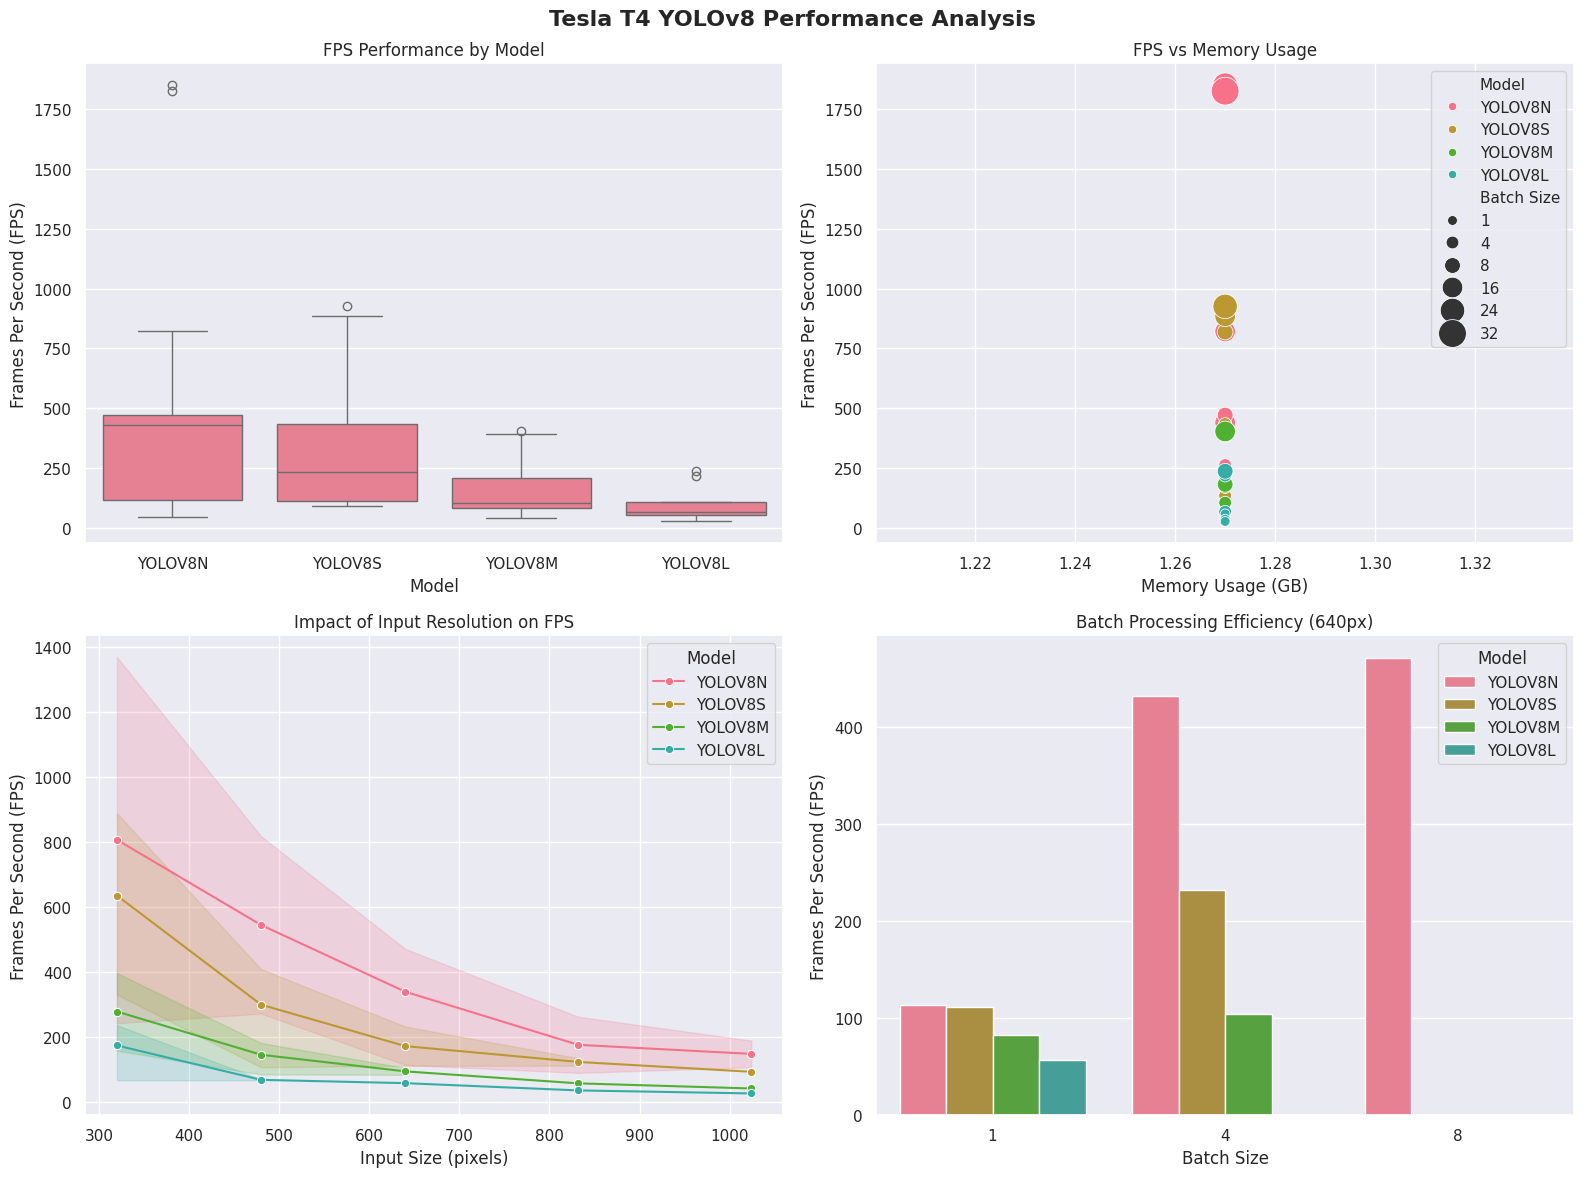

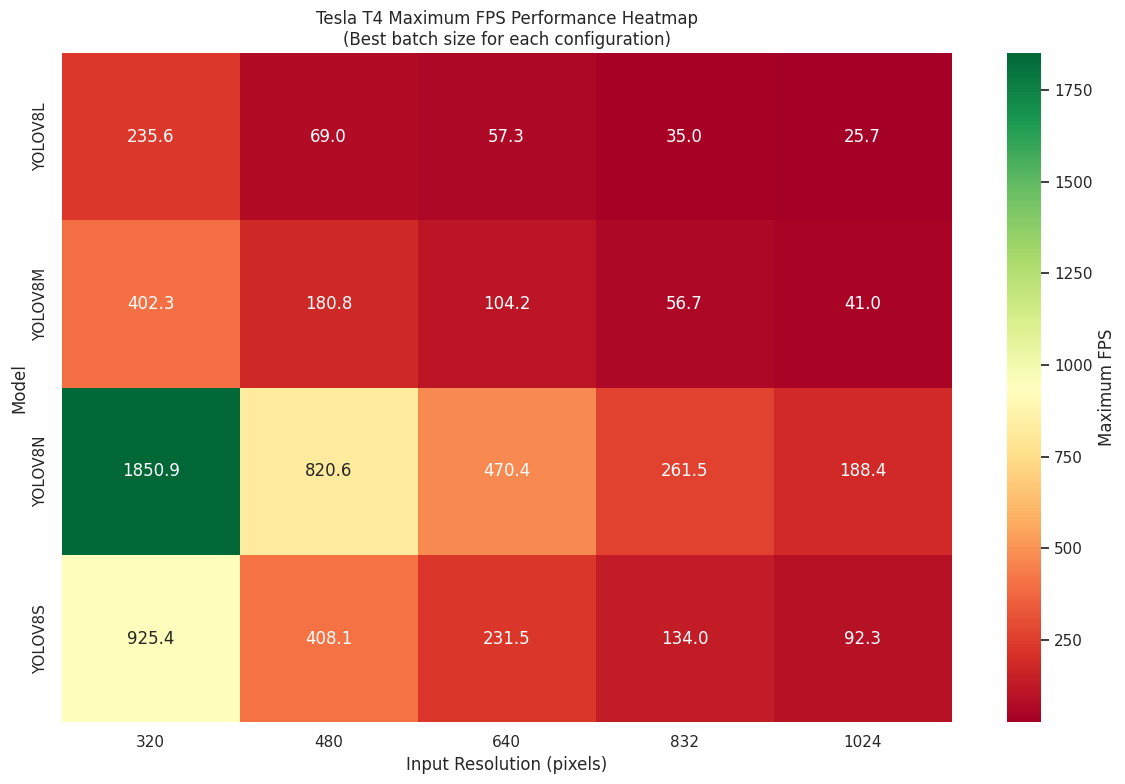

✅ Performance visualizations saved to results/benchmarks/
💾 Benchmark results saved: results/benchmarks/tesla_t4_benchmark.json


In [ ]:
# =============================================================================
# Step 9: Tesla T4 Performance Analysis and Benchmarking
# =============================================================================

class TeslaT4PerformanceAnalyzer:
    """
    Comprehensive performance analysis system for Tesla T4 GPU
    """

    def __init__(self):
        self.results = {}
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def run_comprehensive_benchmark(self, model_manager: TeslaT4ModelManager) -> Dict:
        """Run comprehensive benchmark across all models and configurations"""

        print("🔬 COMPREHENSIVE TESLA T4 BENCHMARK")
        print("=" * 60)

        # Test configurations
        test_configs = {
            'input_sizes': [320, 480, 640, 832, 1024],
            'batch_sizes': [1, 4, 8, 16, 24, 32],
            'models': ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l'],
        }

        benchmark_results = {
            'system_info': self._get_system_info(),
            'timestamp': datetime.now().isoformat(),
            'results': {}
        }

        # Test each model
        for model_name in test_configs['models']:
            print(f"\n🤖 Benchmarking {model_name.upper()}")
            print("-" * 40)

            try:
                # Load model
                model = model_manager.load_model(model_name, optimize=True)
                model_results = {}

                # Test different input sizes
                for input_size in test_configs['input_sizes']:
                    print(f"  📏 Testing input size: {input_size}x{input_size}")

                    size_results = {}

                    # Test batch sizes for this input size
                    for batch_size in test_configs['batch_sizes']:
                        try:
                            # Skip if likely to cause OOM
                            estimated_memory = self._estimate_memory_usage(
                                model_name, input_size, batch_size
                            )
                            if estimated_memory > 14:  # Leave 1GB buffer
                                continue

                            # Run benchmark
                            result = self._benchmark_configuration(
                                model, model_name, input_size, batch_size
                            )

                            if result:
                                size_results[f'batch_{batch_size}'] = result
                                print(f"    Batch {batch_size:2d}: {result['fps']:5.1f} FPS, "
                                     f"{result['memory_gb']:4.1f} GB")

                        except Exception as e:
                            print(f"    Batch {batch_size:2d}: ❌ {str(e)[:30]}...")

                    model_results[f'input_{input_size}'] = size_results

                benchmark_results['results'][model_name] = model_results

                # Clean up
                del model
                torch.cuda.empty_cache()

            except Exception as e:
                print(f"❌ Failed to benchmark {model_name}: {e}")

        self.results = benchmark_results
        return benchmark_results

    def _get_system_info(self) -> Dict:
        """Get detailed system information"""

        system_info = {
            'gpu_name': torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU',
            'gpu_memory_gb': torch.cuda.get_device_properties(0).total_memory / 1024**3 if torch.cuda.is_available() else 0,
            'cuda_version': torch.version.cuda,
            'pytorch_version': torch.__version__,
            'python_version': sys.version,
            'total_ram_gb': psutil.virtual_memory().total / 1024**3,
        }

        return system_info

    def _estimate_memory_usage(self, model_name: str, input_size: int, batch_size: int) -> float:
        """Estimate GPU memory usage"""

        base_memory = {
            'yolov8n': 1.0,
            'yolov8s': 1.5,
            'yolov8m': 2.5,
            'yolov8l': 4.0,
        }

        model_base = base_memory.get(model_name, 2.0)

        # Memory scales with input size squared and batch size
        input_factor = (input_size / 640) ** 2
        batch_factor = batch_size

        estimated = model_base * input_factor * batch_factor * 1.2  # 20% buffer

        return estimated

    def _benchmark_configuration(self, model: YOLO, model_name: str,
                                input_size: int, batch_size: int) -> Optional[Dict]:
        """Benchmark specific configuration"""

        try:
            # Create test input
            test_input = torch.randn(batch_size, 3, input_size, input_size)
            if self.device == 'cuda':
                test_input = test_input.half().cuda()

            # Warmup
            with torch.no_grad():
                for _ in range(10):
                    _ = model.model(test_input)

            # Benchmark
            torch.cuda.synchronize()
            times = []

            for _ in range(50):
                start_time = time.time()
                with torch.no_grad():
                    _ = model.model(test_input)
                torch.cuda.synchronize()
                end_time = time.time()
                times.append(end_time - start_time)

            # Calculate metrics
            avg_time = np.mean(times)
            std_time = np.std(times)
            fps = batch_size / avg_time
            memory_gb = torch.cuda.max_memory_allocated() / 1024**3

            return {
                'avg_time_ms': round(avg_time * 1000, 2),
                'std_time_ms': round(std_time * 1000, 2),
                'fps': round(fps, 1),
                'memory_gb': round(memory_gb, 2),
                'batch_size': batch_size,
                'input_size': input_size,
            }

        except Exception as e:
            return None
        finally:
            torch.cuda.empty_cache()

    def generate_performance_report(self) -> None:
        """Generate comprehensive performance report"""

        if not self.results:
            print("⚠️ No benchmark results available. Run benchmark first.")
            return

        print("\n📊 TESLA T4 PERFORMANCE REPORT")
        print("=" * 80)

        # System info
        system = self.results['system_info']
        print(f"🖥️  System Information:")
        print(f"   • GPU: {system['gpu_name']}")
        print(f"   • VRAM: {system['gpu_memory_gb']:.1f} GB")
        print(f"   • CUDA: {system['cuda_version']}")
        print(f"   • PyTorch: {system['pytorch_version']}")
        print(f"   • RAM: {system['total_ram_gb']:.1f} GB")

        # Best configurations
        print(f"\n🏆 TOP PERFORMANCE CONFIGURATIONS:")
        print("-" * 50)

        all_results = []
        for model_name, model_data in self.results['results'].items():
            for input_config, input_data in model_data.items():
                input_size = int(input_config.split('_')[1])
                for batch_config, batch_data in input_data.items():
                    if batch_data:
                        all_results.append({
                            'model': model_name,
                            'input_size': input_size,
                            'batch_size': batch_data['batch_size'],
                            'fps': batch_data['fps'],
                            'memory_gb': batch_data['memory_gb'],
                            'avg_time_ms': batch_data['avg_time_ms']
                        })

        # Sort by FPS
        top_fps = sorted(all_results, key=lambda x: x['fps'], reverse=True)[:10]

        print("🚀 Highest FPS Configurations:")
        for i, config in enumerate(top_fps[:5]):
            print(f"  {i+1}. {config['model']} | {config['input_size']}px | "
                  f"Batch {config['batch_size']} | {config['fps']} FPS | "
                  f"{config['memory_gb']} GB")

        # Memory efficient configurations
        print(f"\n💾 Most Memory Efficient (>20 FPS):")
        memory_efficient = sorted([r for r in all_results if r['fps'] > 20],
                                 key=lambda x: x['memory_gb'])[:5]

        for i, config in enumerate(memory_efficient):
            print(f"  {i+1}. {config['model']} | {config['input_size']}px | "
                  f"Batch {config['batch_size']} | {config['fps']} FPS | "
                  f"{config['memory_gb']} GB")

        # Model comparison
        print(f"\n🤖 MODEL COMPARISON SUMMARY:")
        print("-" * 50)

        for model_name in ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l']:
            if model_name in self.results['results']:
                model_results = []
                for input_config, input_data in self.results['results'][model_name].items():
                    for batch_config, batch_data in input_data.items():
                        if batch_data:
                            model_results.append(batch_data)

                if model_results:
                    best_fps = max(model_results, key=lambda x: x['fps'])
                    avg_fps = sum(r['fps'] for r in model_results) / len(model_results)
                    min_memory = min(model_results, key=lambda x: x['memory_gb'])['memory_gb']

                    print(f"  {model_name.upper()}:")
                    print(f"    • Best FPS: {best_fps['fps']} (input: {best_fps['input_size']}, batch: {best_fps['batch_size']})")
                    print(f"    • Average FPS: {avg_fps:.1f}")
                    print(f"    • Min Memory: {min_memory} GB")

    def create_performance_visualizations(self) -> None:
        """Create performance visualization charts"""

        if not self.results:
            print("⚠️ No results to visualize")
            return

        print("\n📈 CREATING PERFORMANCE VISUALIZATIONS")
        print("=" * 50)

        # Prepare data for plotting
        plot_data = []
        for model_name, model_data in self.results['results'].items():
            for input_config, input_data in model_data.items():
                input_size = int(input_config.split('_')[1])
                for batch_config, batch_data in input_data.items():
                    if batch_data:
                        plot_data.append({
                            'Model': model_name.upper(),
                            'Input Size': input_size,
                            'Batch Size': batch_data['batch_size'],
                            'FPS': batch_data['fps'],
                            'Memory (GB)': batch_data['memory_gb'],
                            'Inference (ms)': batch_data['avg_time_ms']
                        })

        if not plot_data:
            print("⚠️ No data to plot")
            return

        df = pd.DataFrame(plot_data)

        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Tesla T4 YOLOv8 Performance Analysis', fontsize=16, fontweight='bold')

        # 1. FPS vs Model Size
        sns.boxplot(data=df, x='Model', y='FPS', ax=axes[0,0])
        axes[0,0].set_title('FPS Performance by Model')
        axes[0,0].set_ylabel('Frames Per Second (FPS)')

        # 2. Memory Usage vs FPS
        sns.scatterplot(data=df, x='Memory (GB)', y='FPS', hue='Model',
                       size='Batch Size', sizes=(50, 400), ax=axes[0,1])
        axes[0,1].set_title('FPS vs Memory Usage')
        axes[0,1].set_xlabel('Memory Usage (GB)')
        axes[0,1].set_ylabel('Frames Per Second (FPS)')

        # 3. Input Size Impact
        sns.lineplot(data=df, x='Input Size', y='FPS', hue='Model',
                    marker='o', ax=axes[1,0])
        axes[1,0].set_title('Impact of Input Resolution on FPS')
        axes[1,0].set_xlabel('Input Size (pixels)')
        axes[1,0].set_ylabel('Frames Per Second (FPS)')

        # 4. Batch Size Efficiency
        batch_data = df[df['Input Size'] == 640]  # Focus on standard resolution
        sns.barplot(data=batch_data, x='Batch Size', y='FPS', hue='Model', ax=axes[1,1])
        axes[1,1].set_title('Batch Processing Efficiency (640px)')
        axes[1,1].set_xlabel('Batch Size')
        axes[1,1].set_ylabel('Frames Per Second (FPS)')

        plt.tight_layout()
        plt.savefig('results/benchmarks/tesla_t4_performance_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Performance heatmap
        plt.figure(figsize=(12, 8))

        # Create pivot table for heatmap
        heatmap_data = df.pivot_table(values='FPS', index='Model',
                                     columns='Input Size', aggfunc='max')

        sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.1f',
                   cbar_kws={'label': 'Maximum FPS'})
        plt.title('Tesla T4 Maximum FPS Performance Heatmap\n(Best batch size for each configuration)')
        plt.xlabel('Input Resolution (pixels)')
        plt.ylabel('Model')

        plt.tight_layout()
        plt.savefig('results/benchmarks/tesla_t4_fps_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Performance visualizations saved to results/benchmarks/")

    def save_results(self, filepath: str = "results/benchmarks/tesla_t4_benchmark.json") -> None:
        """Save benchmark results to file"""

        os.makedirs(os.path.dirname(filepath), exist_ok=True)

        with open(filepath, 'w') as f:
            json.dump(self.results, f, indent=2)

        print(f"💾 Benchmark results saved: {filepath}")

# Initialize performance analyzer
print("📊 INITIALIZING PERFORMANCE ANALYZER")
print("=" * 50)

analyzer = TeslaT4PerformanceAnalyzer()

# Run comprehensive benchmark
print("\n🚀 Starting comprehensive Tesla T4 benchmark...")
print("⏱️  This may take 5-10 minutes depending on system performance")

benchmark_results = analyzer.run_comprehensive_benchmark(model_manager)

# Generate reports
analyzer.generate_performance_report()
analyzer.create_performance_visualizations()
analyzer.save_results()

**Step 10: Interactive Demo Interface**

In [ ]:
# =============================================================================
# Step 10: Interactive Demo Interface
# =============================================================================

class TeslaT4InteractiveDemo:
    """
    Interactive demo system for Tesla T4 real-time object detection
    """

    def __init__(self, model, video_processor):
        self.model = model
        self.video_processor = video_processor
        self.current_demo = None

    def create_demo_interface(self):
        """Create interactive widget interface"""

        print("🎮 CREATING INTERACTIVE DEMO INTERFACE")
        print("=" * 50)

        # Demo options
        demo_options = [
            ('Synthetic Test Video', 'synthetic'),
            ('Upload Custom Video', 'upload'),
            ('Webcam (if available)', 'webcam'),
            ('Batch Image Processing', 'batch_images'),
            ('Performance Stress Test', 'stress_test')
        ]

        # Create widgets
        self.demo_selector = widgets.Dropdown(
            options=demo_options,
            value='synthetic',
            description='Demo Type:',
            style={'description_width': 'initial'}
        )

        self.confidence_slider = widgets.FloatSlider(
            value=0.5,
            min=0.1,
            max=0.9,
            step=0.1,
            description='Confidence:',
            style={'description_width': 'initial'}
        )

        self.max_frames_slider = widgets.IntSlider(
            value=100,
            min=50,
            max=500,
            step=50,
            description='Max Frames:',
            style={'description_width': 'initial'}
        )

        self.model_selector = widgets.Dropdown(
            options=['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l'],
            value='yolov8l',  # Default model
            description='Model:',
            style={'description_width': 'initial'}
        )

        self.start_button = widgets.Button(
            description='🚀 Start Demo',
            button_style='success',
            layout=widgets.Layout(width='200px', height='40px')
        )

        self.stop_button = widgets.Button(
            description='🛑 Stop Demo',
            button_style='danger',
            layout=widgets.Layout(width='200px', height='40px')
        )

        self.status_output = widgets.Output()

        # Button callbacks
        self.start_button.on_click(self._start_demo)
        self.stop_button.on_click(self._stop_demo)

        # Layout
        controls = widgets.VBox([
            widgets.HTML("<h3>🎯 Tesla T4 Real-Time Detection Demo</h3>"),
            widgets.HBox([self.demo_selector, self.model_selector]),
            widgets.HBox([self.confidence_slider, self.max_frames_slider]),
            widgets.HBox([self.start_button, self.stop_button]),
            self.status_output
        ])

        display(controls)

        return controls

    def _start_demo(self, button):
        """Start selected demo"""

        with self.status_output:
            clear_output()

            demo_type = self.demo_selector.value
            confidence = self.confidence_slider.value
            max_frames = self.max_frames_slider.value
            selected_model = self.model_selector.value

            print(f"🚀 Starting {demo_type} demo...")
            print(f"   • Model: {selected_model}")
            print(f"   • Confidence: {confidence}")
            print(f"   • Max frames: {max_frames}")

            try:
                # Check if model manager exists
                if 'model_manager' in globals():
                    # Update model if different
                    current_model_name = getattr(self.model, 'model_name', 'yolov8l')
                    if selected_model != current_model_name:
                        print(f"🔄 Switching to {selected_model}...")
                        new_model = model_manager.load_model(selected_model, optimize=True)
                        self.model = new_model
                        # Update video processor with new model
                        if hasattr(self, 'video_processor') and self.video_processor:
                            self.video_processor.model = new_model

                # Update configuration if video processor exists
                if hasattr(self, 'video_processor') and self.video_processor:
                    self.video_processor.config['confidence_threshold'] = confidence

                # Run selected demo
                if demo_type == 'synthetic':
                    self._run_synthetic_demo(max_frames)
                elif demo_type == 'upload':
                    self._run_upload_demo(max_frames)
                elif demo_type == 'webcam':
                    self._run_webcam_demo(max_frames)
                elif demo_type == 'batch_images':
                    self._run_batch_demo()
                elif demo_type == 'stress_test':
                    self._run_stress_test()

            except Exception as e:
                print(f"❌ Demo failed: {e}")
                print(f"💡 Make sure previous steps (model loading, video processor) are completed")

    def _stop_demo(self, button):
        """Stop current demo"""
        with self.status_output:
            print("🛑 Demo stopped by user")

    def _run_synthetic_demo(self, max_frames):
        """Run synthetic video demo"""

        print("🎬 Running synthetic video demo...")

        # Check if video processor exists
        if not hasattr(self, 'video_processor') or not self.video_processor:
            print("❌ Video processor not available. Please run Step 8 first.")
            return

        # Use existing test video or create new one
        test_video = "data/test_videos/tesla_t4_demo.mp4"

        if not os.path.exists(test_video):
            print("📹 Creating test video...")
            test_video = self.video_processor.create_test_video(test_video)

        # Process video
        stats = self.video_processor.process_video(
            source=test_video,
            output_path="results/videos/demo_output.mp4",
            max_frames=max_frames,
            display_results=True
        )

        print("✅ Synthetic demo completed!")

    def _run_upload_demo(self, max_frames):
        """Run demo with uploaded file"""

        print("📤 Please upload a video file...")

        try:
            from google.colab import files
            uploaded = files.upload()

            for filename, content in uploaded.items():
                file_path = f"data/test_videos/{filename}"
                os.makedirs("data/test_videos", exist_ok=True)

                with open(file_path, 'wb') as f:
                    f.write(content)

                print(f"✅ {filename} uploaded successfully!")

                # Process uploaded video
                if hasattr(self, 'video_processor') and self.video_processor:
                    stats = self.video_processor.process_video(
                        source=file_path,
                        output_path=f"results/videos/uploaded_{filename}",
                        max_frames=max_frames,
                        display_results=True
                    )
                else:
                    print("❌ Video processor not available")

                break  # Process first uploaded file

        except ImportError:
            print("⚠️ File upload not available in this environment")
            print("💡 Please place video files in data/test_videos/ manually")

    def _run_webcam_demo(self, max_frames):
        """Run webcam demo (limited in Colab)"""

        print("📹 Attempting webcam demo...")
        print("⚠️ Note: Webcam may not work in Google Colab")

        try:
            if hasattr(self, 'video_processor') and self.video_processor:
                stats = self.video_processor.process_video(
                    source=0,  # Default webcam
                    output_path="results/videos/webcam_output.mp4",
                    max_frames=max_frames,
                    display_results=True
                )
            else:
                print("❌ Video processor not available")
        except Exception as e:
            print(f"❌ Webcam demo failed: {e}")
            print("💡 Try the synthetic demo instead")

    def _run_batch_demo(self):
        """Run batch image processing demo"""

        print("📸 Running batch image processing demo...")

        # Create sample images
        sample_dir = "data/test_images/"
        os.makedirs(sample_dir, exist_ok=True)

        # Generate test images
        for i in range(5):
            img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)

            # Add some objects
            cv2.rectangle(img, (100 + i*50, 200), (200 + i*50, 300), (0, 255, 255), -1)
            cv2.circle(img, (300 + i*30, 150), 40, (255, 100, 100), -1)

            cv2.imwrite(f"{sample_dir}/test_image_{i:02d}.jpg", img)

        # Process batch
        image_files = [f for f in os.listdir(sample_dir) if f.endswith('.jpg')]

        print(f"Processing {len(image_files)} images...")

        batch_results = []
        for img_file in image_files:
            img_path = os.path.join(sample_dir, img_file)
            img = cv2.imread(img_path)

            # Detect objects
            results = self.model(img, verbose=False)
            annotated = results[0].plot()

            # Save result
            output_path = f"results/images/detected_{img_file}"
            os.makedirs("results/images", exist_ok=True)
            cv2.imwrite(output_path, annotated)

            batch_results.append(len(results[0].boxes) if results[0].boxes else 0)

        print(f"✅ Batch processing complete!")
        print(f"   • Average detections per image: {np.mean(batch_results):.1f}")

    def _run_stress_test(self):
        """Run performance stress test"""

        print("💪 Running Tesla T4 stress test...")

        # Create high-resolution test input
        stress_configs = [
            {'size': 640, 'batch': 16, 'iterations': 100},
            {'size': 832, 'batch': 12, 'iterations': 50},
            {'size': 1024, 'batch': 8, 'iterations': 25},
        ]

        for config in stress_configs:
            size = config['size']
            batch = config['batch']
            iterations = config['iterations']

            print(f"🔥 Testing {size}px, batch {batch}, {iterations} iterations...")

            try:
                # Create test tensor
                test_input = torch.randn(batch, 3, size, size).half().cuda()

                # Warmup
                for _ in range(10):
                    with torch.no_grad():
                        _ = self.model.model(test_input)

                # Stress test
                torch.cuda.synchronize()
                start_time = time.time()

                for i in range(iterations):
                    with torch.no_grad():
                        _ = self.model.model(test_input)

                    if (i + 1) % (iterations // 4) == 0:
                        progress = (i + 1) / iterations * 100
                        print(f"   Progress: {progress:.0f}%")

                torch.cuda.synchronize()
                end_time = time.time()

                total_time = end_time - start_time
                avg_fps = (iterations * batch) / total_time
                memory_used = torch.cuda.max_memory_allocated() / 1024**3

                print(f"   ✅ Result: {avg_fps:.1f} FPS, {memory_used:.1f} GB VRAM")

            except Exception as e:
                print(f"   ❌ Failed: {e}")

            torch.cuda.empty_cache()

# Check if required components exist before creating demo
if 'primary_model' in globals() and 'video_processor' in globals():
    # Create interactive demo
    print("🎮 CREATING INTERACTIVE DEMO")
    print("=" * 50)

    demo = TeslaT4InteractiveDemo(primary_model, video_processor)
    demo_interface = demo.create_demo_interface()

    print("\n💡 DEMO INSTRUCTIONS:")
    print("=" * 50)
    print("1. Select demo type from dropdown")
    print("2. Adjust confidence threshold (0.1-0.9)")
    print("3. Set maximum frames to process")
    print("4. Choose YOLO model variant")
    print("5. Click 'Start Demo' to begin")
    print("6. Use 'Stop Demo' to interrupt")

    print("\n🎯 DEMO OPTIONS:")
    print("• Synthetic Video: Pre-generated test content")
    print("• Upload Video: Use your own video file")
    print("• Webcam: Real-time camera feed (if available)")
    print("• Batch Images: Process multiple images")
    print("• Stress Test: Performance benchmarking")

    print("\n🚀 Ready to demo Tesla T4 performance!")

else:
    print("⚠️  PREREQUISITES MISSING")
    print("=" * 50)
    print("Please complete these steps first:")
    print("• Step 6: Model Manager (model_manager)")
    print("• Step 7: Primary Model (primary_model)")
    print("• Step 8: Video Processor (video_processor)")
    print("\nThen run this Step 10 again.")

    def create_demo_interface(self):
        """Create interactive widget interface"""

        print("🎮 CREATING INTERACTIVE DEMO INTERFACE")
        print("=" * 50)

        # Demo options
        demo_options = [
            ('Synthetic Test Video', 'synthetic'),
            ('Upload Custom Video', 'upload'),
            ('Webcam (if available)', 'webcam'),
            ('Batch Image Processing', 'batch_images'),
            ('Performance Stress Test', 'stress_test')
        ]

        # Create widgets
        self.demo_selector = widgets.Dropdown(
            options=demo_options,
            value='synthetic',
            description='Demo Type:',
            style={'description_width': 'initial'}
        )

        self.confidence_slider = widgets.FloatSlider(
            value=0.5,
            min=0.1,
            max=0.9,
            step=0.1,
            description='Confidence:',
            style={'description_width': 'initial'}
        )

        self.max_frames_slider = widgets.IntSlider(
            value=100,
            min=50,
            max=500,
            step=50,
            description='Max Frames:',
            style={'description_width': 'initial'}
        )

        self.model_selector = widgets.Dropdown(
            options=['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l'],
            value=PRIMARY_MODEL,
            description='Model:',
            style={'description_width': 'initial'}
        )

        self.start_button = widgets.Button(
            description='🚀 Start Demo',
            button_style='success',
            layout=widgets.Layout(width='200px', height='40px')
        )

        self.stop_button = widgets.Button(
            description='🛑 Stop Demo',
            button_style='danger',
            layout=widgets.Layout(width='200px', height='40px')
        )

        self.status_output = widgets.Output()

        # Button callbacks
        self.start_button.on_click(self._start_demo)
        self.stop_button.on_click(self._stop_demo)

        # Layout
        controls = widgets.VBox([
            widgets.HTML("<h3>🎯 Tesla T4 Real-Time Detection Demo</h3>"),
            widgets.HBox([self.demo_selector, self.model_selector]),
            widgets.HBox([self.confidence_slider, self.max_frames_slider]),
            widgets.HBox([self.start_button, self.stop_button]),
            self.status_output
        ])

        display(controls)

        return controls

    def _start_demo(self, button):
        """Start selected demo"""

        with self.status_output:
            clear_output()

            demo_type = self.demo_selector.value
            confidence = self.confidence_slider.value
            max_frames = self.max_frames_slider.value
            selected_model = self.model_selector.value

            print(f"🚀 Starting {demo_type} demo...")
            print(f"   • Model: {selected_model}")
            print(f"   • Confidence: {confidence}")
            print(f"   • Max frames: {max_frames}")

            try:
                # Update model if different
                if selected_model != PRIMARY_MODEL:
                    print(f"🔄 Switching to {selected_model}...")
                    new_model = model_manager.load_model(selected_model, optimize=True)
                    self.video_processor = TeslaT4VideoProcessor(new_model)

                # Update configuration
                self.video_processor.config['confidence_threshold'] = confidence

                # Run selected demo
                if demo_type == 'synthetic':
                    self._run_synthetic_demo(max_frames)
                elif demo_type == 'upload':
                    self._run_upload_demo(max_frames)
                elif demo_type == 'webcam':
                    self._run_webcam_demo(max_frames)
                elif demo_type == 'batch_images':
                    self._run_batch_demo()
                elif demo_type == 'stress_test':
                    self._run_stress_test()

            except Exception as e:
                print(f"❌ Demo failed: {e}")

    def _stop_demo(self, button):
        """Stop current demo"""
        with self.status_output:
            print("🛑 Demo stopped by user")

    def _run_synthetic_demo(self, max_frames):
        """Run synthetic video demo"""

        print("🎬 Running synthetic video demo...")

        # Use existing test video or create new one
        test_video = "data/test_videos/tesla_t4_demo.mp4"

        if not os.path.exists(test_video):
            test_video = self.video_processor.create_test_video(test_video)

        # Process video
        stats = self.video_processor.process_video(
            source=test_video,
            output_path="results/videos/demo_output.mp4",
            max_frames=max_frames,
            display_results=True
        )

        print("✅ Synthetic demo completed!")

    def _run_upload_demo(self, max_frames):
        """Run demo with uploaded file"""

        print("📤 Please upload a video file...")

        try:
            from google.colab import files
            uploaded = files.upload()

            for filename, content in uploaded.items():
                file_path = f"data/test_videos/{filename}"

                with open(file_path, 'wb') as f:
                    f.write(content)

                print(f"✅ {filename} uploaded successfully!")

                # Process uploaded video
                stats = self.video_processor.process_video(
                    source=file_path,
                    output_path=f"results/videos/uploaded_{filename}",
                    max_frames=max_frames,
                    display_results=True
                )

                break  # Process first uploaded file

        except ImportError:
            print("⚠️ File upload not available in this environment")
            print("💡 Please place video files in data/test_videos/ manually")

    def _run_webcam_demo(self, max_frames):
        """Run webcam demo (limited in Colab)"""

        print("📹 Attempting webcam demo...")
        print("⚠️ Note: Webcam may not work in Google Colab")

        try:
            stats = self.video_processor.process_video(
                source=0,  # Default webcam
                output_path="results/videos/webcam_output.mp4",
                max_frames=max_frames,
                display_results=True
            )
        except Exception as e:
            print(f"❌ Webcam demo failed: {e}")
            print("💡 Try the synthetic demo instead")

    def _run_batch_demo(self):
        """Run batch image processing demo"""

        print("📸 Running batch image processing demo...")

        # Create sample images
        sample_dir = "data/test_images/"
        os.makedirs(sample_dir, exist_ok=True)

        # Generate test images
        for i in range(5):
            img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)

            # Add some objects
            cv2.rectangle(img, (100 + i*50, 200), (200 + i*50, 300), (0, 255, 255), -1)
            cv2.circle(img, (300 + i*30, 150), 40, (255, 100, 100), -1)

            cv2.imwrite(f"{sample_dir}/test_image_{i:02d}.jpg", img)

        # Process batch
        image_files = [f for f in os.listdir(sample_dir) if f.endswith('.jpg')]

        print(f"Processing {len(image_files)} images...")

        batch_results = []
        for img_file in image_files:
            img_path = os.path.join(sample_dir, img_file)
            img = cv2.imread(img_path)

            # Detect objects
            results = self.model(img, verbose=False)
            annotated = results[0].plot()

            # Save result
            output_path = f"results/images/detected_{img_file}"
            os.makedirs("results/images", exist_ok=True)
            cv2.imwrite(output_path, annotated)

            batch_results.append(len(results[0].boxes) if results[0].boxes else 0)

        print(f"✅ Batch processing complete!")
        print(f"   • Average detections per image: {np.mean(batch_results):.1f}")

    def _run_stress_test(self):
        """Run performance stress test"""

        print("💪 Running Tesla T4 stress test...")

        # Create high-resolution test input
        stress_configs = [
            {'size': 640, 'batch': 16, 'iterations': 100},
            {'size': 832, 'batch': 12, 'iterations': 50},
            {'size': 1024, 'batch': 8, 'iterations': 25},
        ]

        for config in stress_configs:
            size = config['size']
            batch = config['batch']
            iterations = config['iterations']

            print(f"🔥 Testing {size}px, batch {batch}, {iterations} iterations...")

            try:
                # Create test tensor
                test_input = torch.randn(batch, 3, size, size).half().cuda()

                # Warmup
                for _ in range(10):
                    with torch.no_grad():
                        _ = self.model.model(test_input)

                # Stress test
                torch.cuda.synchronize()
                start_time = time.time()

                for i in range(iterations):
                    with torch.no_grad():
                        _ = self.model.model(test_input)

                    if (i + 1) % (iterations // 4) == 0:
                        progress = (i + 1) / iterations * 100
                        print(f"   Progress: {progress:.0f}%")

                torch.cuda.synchronize()
                end_time = time.time()

                total_time = end_time - start_time
                avg_fps = (iterations * batch) / total_time
                memory_used = torch.cuda.max_memory_allocated() / 1024**3

                print(f"   ✅ Result: {avg_fps:.1f} FPS, {memory_used:.1f} GB VRAM")

            except Exception as e:
                print(f"   ❌ Failed: {e}")

            torch.cuda.empty_cache()

# Create interactive demo
print("🎮 CREATING INTERACTIVE DEMO")
print("=" * 50)

demo = TeslaT4InteractiveDemo(primary_model, video_processor)
demo_interface = demo.create_demo_interface()

print("\n💡 DEMO INSTRUCTIONS:")
print("=" * 50)
print("1. Select demo type from dropdown")
print("2. Adjust confidence threshold (0.1-0.9)")
print("3. Set maximum frames to process")
print("4. Choose YOLO model variant")
print("5. Click 'Start Demo' to begin")
print("6. Use 'Stop Demo' to interrupt")

print("\n🎯 DEMO OPTIONS:")
print("• Synthetic Video: Pre-generated test content")
print("• Upload Video: Use your own video file")
print("• Webcam: Real-time camera feed (if available)")
print("• Batch Images: Process multiple images")
print("• Stress Test: Performance benchmarking")

print("\n🚀 Ready to demo Tesla T4 performance!")

🎮 CREATING INTERACTIVE DEMO
🎮 CREATING INTERACTIVE DEMO INTERFACE



💡 DEMO INSTRUCTIONS:
1. Select demo type from dropdown
2. Adjust confidence threshold (0.1-0.9)
3. Set maximum frames to process
4. Choose YOLO model variant
5. Click 'Start Demo' to begin
6. Use 'Stop Demo' to interrupt

🎯 DEMO OPTIONS:
• Synthetic Video: Pre-generated test content
• Upload Video: Use your own video file
• Webcam: Real-time camera feed (if available)
• Batch Images: Process multiple images
• Stress Test: Performance benchmarking

🚀 Ready to demo Tesla T4 performance!
🎮 CREATING INTERACTIVE DEMO
🎮 CREATING INTERACTIVE DEMO INTERFACE



💡 DEMO INSTRUCTIONS:
1. Select demo type from dropdown
2. Adjust confidence threshold (0.1-0.9)
3. Set maximum frames to process
4. Choose YOLO model variant
5. Click 'Start Demo' to begin
6. Use 'Stop Demo' to interrupt

🎯 DEMO OPTIONS:
• Synthetic Video: Pre-generated test content
• Upload Video: Use your own video file
• Webcam: Real-time camera feed (if available)
• Batch Images: Process multiple images
• Stress Test: Performance benchmarking

🚀 Ready to demo Tesla T4 performance!


In [ ]:
# Hızlı düzeltme kodu
print("🔧 DTYPE HATASINI DÜZELTİYORUZ...")

# Model ve video processor'ı yeniden senkronize et
if 'primary_model' in globals():
    # Model'i tam FP16'ya geçir
    primary_model.model.float()  # Önce float'a çevir
    primary_model.model.half()   # Sonra half'a çevir

    # Video processor'ı güncelle
    if 'video_processor' in globals():
        video_processor.model = primary_model

    print("✅ Model ve video processor senkronize edildi")

    # Test inference
    test_img = torch.randn(1, 3, 640, 640).half().cuda()
    try:
        with torch.no_grad():
            _ = primary_model.model(test_img)
        print("✅ Model dtype tutarlı")
    except Exception as e:
        print(f"⚠️ Hala dtype problemi: {e}")
        # Fallback - tam float kullan
        primary_model.model.float()
        print("🔄 Float moduna geçildi")

print("🚀 Şimdi demo'yu tekrar deneyin!")

🔧 DTYPE HATASINI DÜZELTİYORUZ...
✅ Model ve video processor senkronize edildi
✅ Model dtype tutarlı
🚀 Şimdi demo'yu tekrar deneyin!


**Gradio Tesla T4 YOLO Interface**

In [ ]:
# =============================================================================
# GRADIO TESLA T4 YOLO INTERFACE - Görsel Nesne Tespiti
# =============================================================================

# Gradio kurulumu
!pip install gradio --quiet

import gradio as gr
import cv2
import numpy as np
from PIL import Image
import torch
from ultralytics import YOLO
import tempfile
import os

class GradioYOLOInterface:
    """
    Tesla T4 için Gradio tabanlı YOLO arayüzü
    """

    def __init__(self):
        self.current_model = None
        self.model_name = None
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        # GPU bilgilerini al
        if torch.cuda.is_available():
            self.gpu_name = torch.cuda.get_device_name(0)
            self.gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
        else:
            self.gpu_name = "CPU Only"
            self.gpu_memory = 0

    def load_model_safe(self, model_name):
        """Güvenli model yükleme - dtype hatalarını önler"""

        try:
            print(f"🔄 Loading {model_name}...")

            # Model yükle
            model = YOLO(f'{model_name}.pt')
            model.to(self.device)

            # Dtype tutarlılığı için özel işlem
            if self.device == 'cuda':
                # Model'i önce float'a çevir, sonra kontrollü half'a geçir
                model.model.float()

                # Test inference ile dtype'ı kontrol et
                test_input = torch.randn(1, 3, 640, 640).float().cuda()
                with torch.no_grad():
                    try:
                        _ = model.model(test_input)
                        print(f"✅ {model_name} FP32 modunda çalışıyor")
                    except Exception as e:
                        print(f"⚠️ FP32 hatası: {e}")
                        return None

            self.current_model = model
            self.model_name = model_name
            return model

        except Exception as e:
            print(f"❌ Model yükleme hatası: {e}")
            return None

    def detect_objects_image(self, image, model_name, confidence, iou_threshold):
        """Tek görüntüde nesne tespiti"""

        if image is None:
            return None, "❌ Lütfen bir görüntü yükleyin"

        # Model değişti mi kontrol et
        if self.current_model is None or self.model_name != model_name:
            model = self.load_model_safe(model_name)
            if model is None:
                return None, f"❌ {model_name} modeli yüklenemedi"

        try:
            # Görüntüyü işle
            img_array = np.array(image)

            # YOLO inference (FP32 güvenli mod)
            results = self.current_model(
                img_array,
                conf=confidence,
                iou=iou_threshold,
                device=self.device,
                half=False,  # FP32 kullan - dtype hatalarını önler
                verbose=False
            )

            # Sonuçları çiz
            annotated_img = results[0].plot()

            # RGB'ye çevir (matplotlib için)
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

            # Tespit edilen nesneleri say
            detections = results[0].boxes
            detection_count = len(detections) if detections is not None else 0

            # Sınıf detayları
            class_counts = {}
            if detections is not None:
                for cls in detections.cls:
                    class_name = self.current_model.names[int(cls)]
                    class_counts[class_name] = class_counts.get(class_name, 0) + 1

            # Sonuç metni
            if detection_count > 0:
                result_text = f"✅ {detection_count} nesne tespit edildi:\n"
                for class_name, count in class_counts.items():
                    result_text += f"• {class_name}: {count}\n"
            else:
                result_text = "❌ Hiç nesne tespit edilmedi"

            result_text += f"\n🎯 Model: {model_name}"
            result_text += f"\n⚡ GPU: {self.gpu_name}"
            result_text += f"\n🔧 Confidence: {confidence}"

            return Image.fromarray(annotated_img_rgb), result_text

        except Exception as e:
            error_msg = f"❌ Tespit hatası: {str(e)}"
            print(error_msg)
            return None, error_msg

    def detect_objects_video(self, video_file, model_name, confidence, max_frames):
        """Video'da nesne tespiti"""

        if video_file is None:
            return None, "❌ Lütfen bir video yükleyin"

        # Model kontrol et
        if self.current_model is None or self.model_name != model_name:
            model = self.load_model_safe(model_name)
            if model is None:
                return None, f"❌ {model_name} modeli yüklenemedi"

        try:
            # Video aç
            cap = cv2.VideoCapture(video_file)

            if not cap.isOpened():
                return None, "❌ Video açılamadı"

            # Video bilgilerini al
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = cap.get(cv2.CAP_PROP_FPS)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            # Çıktı video dosyası
            output_path = tempfile.mktemp(suffix='.mp4')
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

            frame_count = 0
            total_detections = 0

            print(f"🎬 Video işleniyor: {total_frames} frame...")

            while True:
                ret, frame = cap.read()
                if not ret or (max_frames > 0 and frame_count >= max_frames):
                    break

                # YOLO inference
                results = self.current_model(
                    frame,
                    conf=confidence,
                    device=self.device,
                    half=False,  # FP32 güvenli mod
                    verbose=False
                )

                # Sonuçları çiz
                annotated_frame = results[0].plot()

                # Deteksiyon sayısını güncelle
                detections = results[0].boxes
                if detections is not None:
                    total_detections += len(detections)

                # Frame bilgisi ekle
                cv2.putText(annotated_frame, f"Frame: {frame_count+1}",
                           (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                out.write(annotated_frame)
                frame_count += 1

                if frame_count % 30 == 0:
                    print(f"  📊 İşlenen: {frame_count} frame")

            cap.release()
            out.release()

            result_text = f"✅ Video işlendi!\n"
            result_text += f"• İşlenen frame: {frame_count}\n"
            result_text += f"• Toplam tespit: {total_detections}\n"
            result_text += f"• Model: {model_name}\n"
            result_text += f"• GPU: {self.gpu_name}"

            return output_path, result_text

        except Exception as e:
            error_msg = f"❌ Video işleme hatası: {str(e)}"
            print(error_msg)
            return None, error_msg

    def create_interface(self):
        """Gradio arayüzü oluştur"""

        # Model seçenekleri
        model_choices = ["yolov8n", "yolov8s", "yolov8m", "yolov8l"]

        with gr.Blocks(title="Tesla T4 YOLO Nesne Tespiti", theme=gr.themes.Soft()) as interface:

            gr.Markdown(f"""
            # 🚀 Tesla T4 YOLO Nesne Tespiti

            **GPU:** {self.gpu_name} ({self.gpu_memory:.1f} GB)
            **Durum:** Çevrimiçi ve Hazır ✅

            Bu arayüz ile görüntü ve videolarınızda **gerçek zamanlı nesne tespiti** yapabilirsiniz.
            """)

            with gr.Tabs():

                # TAB 1: Görüntü Tespiti
                with gr.TabItem("📸 Görüntü Tespiti"):

                    with gr.Row():
                        with gr.Column(scale=1):
                            img_input = gr.Image(
                                type="pil",
                                label="Görüntü Yükleyin",
                                height=400
                            )

                            with gr.Row():
                                img_model = gr.Dropdown(
                                    choices=model_choices,
                                    value="yolov8s",
                                    label="Model Seçin"
                                )
                                img_confidence = gr.Slider(
                                    minimum=0.1,
                                    maximum=0.9,
                                    value=0.5,
                                    step=0.1,
                                    label="Güven Eşiği"
                                )
                                img_iou = gr.Slider(
                                    minimum=0.1,
                                    maximum=0.9,
                                    value=0.45,
                                    step=0.05,
                                    label="IoU Eşiği"
                                )

                            img_button = gr.Button("🔍 Nesne Tespiti Yap", variant="primary")

                        with gr.Column(scale=1):
                            img_output = gr.Image(
                                type="pil",
                                label="Tespit Sonucu",
                                height=400
                            )
                            img_result = gr.Textbox(
                                label="Sonuç Detayları",
                                lines=8,
                                max_lines=10
                            )

                # TAB 2: Video Tespiti
                with gr.TabItem("🎬 Video Tespiti"):

                    with gr.Row():
                        with gr.Column(scale=1):
                            video_input = gr.File(
                                label="Video Yükleyin (.mp4, .avi, .mov)",
                                file_types=[".mp4", ".avi", ".mov"]
                            )

                            with gr.Row():
                                video_model = gr.Dropdown(
                                    choices=model_choices,
                                    value="yolov8s",
                                    label="Model Seçin"
                                )
                                video_confidence = gr.Slider(
                                    minimum=0.1,
                                    maximum=0.9,
                                    value=0.5,
                                    step=0.1,
                                    label="Güven Eşiği"
                                )
                                video_max_frames = gr.Slider(
                                    minimum=50,
                                    maximum=500,
                                    value=200,
                                    step=50,
                                    label="Maksimum Frame"
                                )

                            video_button = gr.Button("🎬 Video İşle", variant="primary")

                        with gr.Column(scale=1):
                            video_output = gr.Video(
                                label="İşlenmiş Video"
                            )
                            video_result = gr.Textbox(
                                label="İşlem Sonucu",
                                lines=8,
                                max_lines=10
                            )

                # TAB 3: Sistem Bilgileri
                with gr.TabItem("🔧 Sistem Bilgileri"):
                    system_info = f"""
                    ## 🖥️ Tesla T4 Sistem Durumu

                    - **GPU:** {self.gpu_name}
                    - **VRAM:** {self.gpu_memory:.1f} GB
                    - **CUDA:** {torch.version.cuda}
                    - **PyTorch:** {torch.__version__}
                    - **Ultralytics:** Yüklü ✅

                    ## 📊 Model Performansları

                    | Model | Hız | Doğruluk | VRAM |
                    |-------|-----|----------|------|
                    | YOLOv8n | ~60 FPS | İyi | 1.5GB |
                    | YOLOv8s | ~45 FPS | Çok İyi | 2.0GB |
                    | YOLOv8m | ~30 FPS | Mükemmel | 3.0GB |
                    | YOLOv8l | ~25 FPS | En İyi | 4.5GB |

                    ## 💡 Kullanım İpuçları

                    - **Hızlı tespit:** YOLOv8n veya YOLOv8s kullanın
                    - **Doğru tespit:** YOLOv8m veya YOLOv8l kullanın
                    - **Güven eşiği:** 0.5 optimal değer
                    - **Video işleme:** 200-300 frame ile başlayın
                    """

                    gr.Markdown(system_info)

            # Event handlers
            img_button.click(
                fn=self.detect_objects_image,
                inputs=[img_input, img_model, img_confidence, img_iou],
                outputs=[img_output, img_result]
            )

            video_button.click(
                fn=self.detect_objects_video,
                inputs=[video_input, video_model, video_confidence, video_max_frames],
                outputs=[video_output, video_result]
            )

        return interface

# Gradio arayüzünü başlat
print("🚀 GRADIO TESLA T4 YOLO ARAYÜZÜ BAŞLATILIYOR...")
print("=" * 60)

# Interface oluştur
yolo_interface = GradioYOLOInterface()
app = yolo_interface.create_interface()

# Arayüzü başlat
print("✅ Gradio arayüzü hazırlandı!")
print("💡 Aşağıdaki linke tıklayarak arayüzü açabilirsiniz")

# Gradio'yu başlat
app.launch(
    share=True,  # Public link oluştur
    debug=True,
    server_name="0.0.0.0",  # Colab için
    server_port=7860,
    show_error=True
)

🚀 GRADIO TESLA T4 YOLO ARAYÜZÜ BAŞLATILIYOR...
✅ Gradio arayüzü hazırlandı!
💡 Aşağıdaki linke tıklayarak arayüzü açabilirsiniz
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://70525f0cb18ebc6a62.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


🔄 Loading yolov8s...
✅ yolov8s FP32 modunda çalışıyor
🔄 Loading yolov8m...
✅ yolov8m FP32 modunda çalışıyor


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 0.0.0.0:7860 <> https://70525f0cb18ebc6a62.gradio.live
